In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os

sys.path.append("../../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *

In [2]:
#grid
sx = 1.5
sy = 1.5
sz = .15
x0 = 0
y0 = 0
z0 = -15
nx = 140
ny = 70
nz = 70
x1 = x0 + nx*sx
y1 = y0 + ny*sy
z1 = z0 + nz

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

domain = np.ones([ny,nx],dtype=bool)

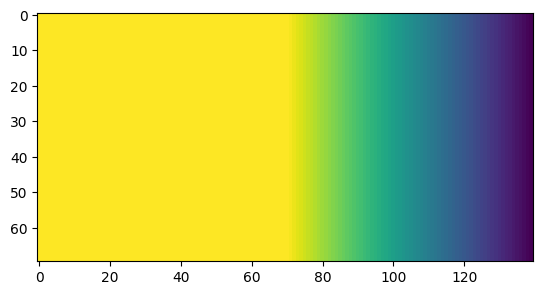

In [3]:
mean_A = np.ones([ny, nx])*-11
mean_A[:, 70:] = np.linspace(-11, -13, 70)
# mean_A[0, 0] = 1
plt.imshow(mean_A)

In [4]:
## create pile

P1 = Pile(name = "P1",seed=1)
PD = Pile(name = "PD",seed=1)

#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[30,30]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[40,40]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[60, 60]})])
covmodelA = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[60, 100]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[50,50]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential", {"w":.21,"r":[50, 50, 10]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B1 = gcm.CovModel3D(elem=[("exponential", {"w":.16,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B2 = gcm.CovModel3D(elem=[("exponential", {"w":.24,"r":[100, 100, 3]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B3 = gcm.CovModel3D(elem=[("exponential", {"w":.19,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B4 = gcm.CovModel3D(elem=[("exponential", {"w":.13,"r":[100, 100, 4]})], alpha=0, name="vario_SIS") # input variogram

lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelB=[covmodel_SIS_B1, covmodel_SIS_B2, covmodel_SIS_B3, covmodel_SIS_B4] # list of covmodels to pass


#create Lithologies 
dic_s_D2 = {"int_method" : "grf_ineq","covmodel" : covmodelD1}
dic_f_D2 = {"f_method":"homogenous"}
D2 = Unit(name="D2",order=1,ID = 10,color="goldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D2),
          dic_facies=dic_f_D2)
dic_s_D1 = {"int_method" : "grf_ineq","covmodel" : covmodelD1, "mean":-6.5}
dic_f_D1 = {"f_method":"homogenous"}
D1 = Unit(name="D1",order=2,ID = 11,color="palegoldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D1)
            ,dic_facies=dic_f_D1)


PD.add_unit([D1,D2])

dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"SubPile", "SubPile":PD}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC, "mean":-7}
dic_f_C = {"f_method" : "SIS","neig" : 10, "f_covmodel":lst_covmodelC, "probability":[0.3, 0.7]}
C = Unit(name="C", order=2, ID = 2, color="blue", contact="onlap", dic_facies=dic_f_C, surface=Surface(dic_surf=dic_s_C, contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB, "mean":-8.5}
dic_f_B = {"f_method":"SIS", "neig" : 10, "f_covmodel":lst_covmodelB, "probability":[0.2, 0.4, 0.25, 0.15]}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelA, "mean":mean_A}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

Unit D2: Surface added for interpolation
Unit D1: Surface added for interpolation
Stratigraphic unit D1 added ✅
Stratigraphic unit D2 added ✅
Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added ✅
Stratigraphic unit C added ✅
Stratigraphic unit B added ✅
Stratigraphic unit A added ✅


In [5]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[30,30,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[20,20, 5]})],alpha=0,name="K_vario_2")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1, facies_2, facies_3, facies_5])
D.add_facies([facies_1, facies_5])
D1.add_facies([facies_1])
D2.add_facies([facies_5])
C.add_facies([facies_4, facies_6])

# property model
cm_prop1 = gcm.CovModel3D(elem = [("spherical", {"w":0.1, "r":[10,10,10]}),
                                  ("cubic", {"w":0.1, "r":[15,15,15]})])
cm_prop2 = gcm.CovModel3D(elem = [("cubic", {"w":0.2, "r":[25, 25, 5]})])

list_facies = [facies_1, facies_2, facies_3, facies_4, facies_5, facies_6, facies_7]
list_covmodels = [cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2]
means = [-4, -2, -6, -9, -6, -7, -19]
prop_model = ArchPy.base.Prop("K",
                              facies = list_facies,
                              covmodels = list_covmodels,
                                means = means,
                                int_method = "sgs",
                                vmin = -10,
                                vmax = -1
                                )



Facies basement added to unit A ✅
Facies Sand added to unit B ✅
Facies Gravel added to unit B ✅
Facies GM added to unit B ✅
Facies SM added to unit B ✅
Facies Sand added to unit D ✅
Facies SM added to unit D ✅
Facies Sand added to unit D1 ✅
Facies SM added to unit D2 ✅
Facies Clay added to unit C ✅
Facies Silt added to unit C ✅


In [6]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [7]:
T1 = Arch_table(name = "P1",seed=3)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot, polygon=domain)
T1.add_prop(prop_model)

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Property K added


In [8]:
T1.get_yg()

array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
        13.5,  15. ,  16.5,  18. ,  19.5,  21. ,  22.5,  24. ,  25.5,
        27. ,  28.5,  30. ,  31.5,  33. ,  34.5,  36. ,  37.5,  39. ,
        40.5,  42. ,  43.5,  45. ,  46.5,  48. ,  49.5,  51. ,  52.5,
        54. ,  55.5,  57. ,  58.5,  60. ,  61.5,  63. ,  64.5,  66. ,
        67.5,  69. ,  70.5,  72. ,  73.5,  75. ,  76.5,  78. ,  79.5,
        81. ,  82.5,  84. ,  85.5,  87. ,  88.5,  90. ,  91.5,  93. ,
        94.5,  96. ,  97.5,  99. , 100.5, 102. , 103.5, 105. ],
      dtype=float32)

In [9]:
# create fake borehole
# bh1 = ArchPy.base.borehole("fake1", 1, x=200, y=10, z=-6, depth=7, log_strati=[(D2, -6), (D1, -7), (C, -7.5), (B, -8)])
# bh2 = ArchPy.base.borehole("fake2", 2, x=200, y=30, z=-6, depth=7, log_strati=[(D2, -6), (D1, -7), (C, -7.5), (B, -8)])
# bh3 = ArchPy.base.borehole("fake3", 3, x=200, y=60, z=-6, depth=7, log_strati=[(D2, -6), (D1, -7), (C, -7.5), (B, -8)])
# bh4 = ArchPy.base.borehole("fake4", 4, x=200, y=80, z=-6, depth=7, log_strati=[(D2, -6), (D1, -7), (C, -7.5), (B, -8)])

# bh5 = ArchPy.base.borehole("fake1", 5, x=160, y=10, z=-6, depth=7, log_strati=[(D2, -6), (D1, -7), (C, -7.5), (B, -8)])
# bh6 = ArchPy.base.borehole("fake2", 6, x=160, y=30, z=-6, depth=7, log_strati=[(D2, -6), (D1, -7), (C, -7.5), (B, -8)])
# bh7 = ArchPy.base.borehole("fake3", 7, x=160, y=60, z=-6, depth=7, log_strati=[(D2, -6), (D1, -7), (C, -7.5), (B, -8)])
# bh8 = ArchPy.base.borehole("fake4", 8, x=160, y=80, z=-6, depth=7, log_strati=[(D2, -6), (D1, -7), (C, -7.5), (B, -8)])
# T1.add_bh()
# T1.add_fake_bh([bh1, bh2, bh3, bh4, bh5, bh6, bh7, bh8])

In [10]:
T1.process_bhs(reprocess=True)

Hard data reset
##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n
Pile PD: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set
No borehole found - no hd extracted


In [11]:
T1.compute_surf(1)

Boreholes not processed, fully unconditional simulations will be tempted
########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.06205630302429199 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.04404020309448242 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.03804802894592285 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.06405806541442871 s
##########################

########## PILE PD ##########
Pile PD: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT D1
D1: time elapsed for computing surface 0.042229413986206055 s

#### COMPUTING SURFACE OF UNIT D2
D2: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.02802562713623047 s
##########################


#

In [12]:
ArchPy.inputs.save_project(T1)  # save here to only consider surfaces

Project saved successfully


True

In [38]:
T1.compute_facies(1)
T1.compute_prop(1)


### Unit D: facies simulation with SubPile method ####
SubPile filling method, nothing happened
Time elapsed 0.0 s

### Unit C: facies simulation with SIS method ####
### Unit C - realization 0 ###
Only one facies covmodels for multiples facies, adapt sill to right proportions
Time elapsed 0.9 s

### Unit B: facies simulation with SIS method ####
### Unit B - realization 0 ###
Time elapsed 1.32 s

### Unit A: facies simulation with homogenous method ####
### Unit A - realization 0 ###
Time elapsed 0.01 s

### Unit D2: facies simulation with homogenous method ####
### Unit D2 - realization 0 ###
Time elapsed 0.01 s

### Unit D1: facies simulation with homogenous method ####
### Unit D1 - realization 0 ###
Time elapsed 0.0 s

### 2.24: Total time elapsed for computing facies ###
### 1 K property models will be modeled ###
### 1 K models done


In [17]:
pv.set_jupyter_backend("static")

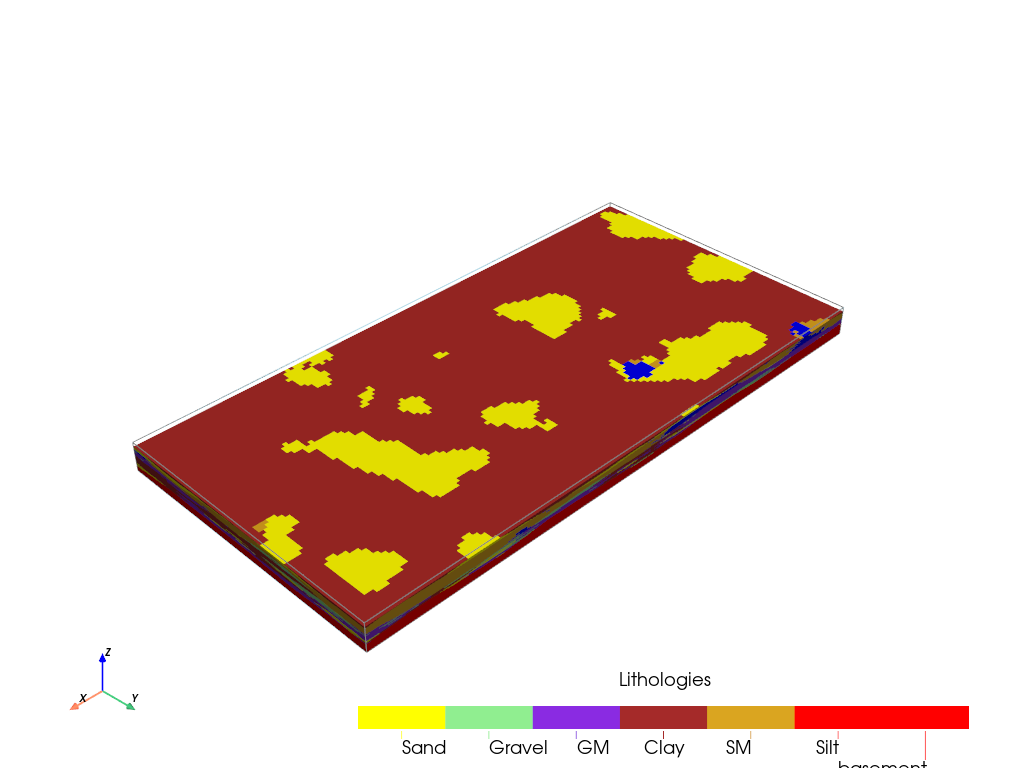

In [39]:
T1.plot_facies()

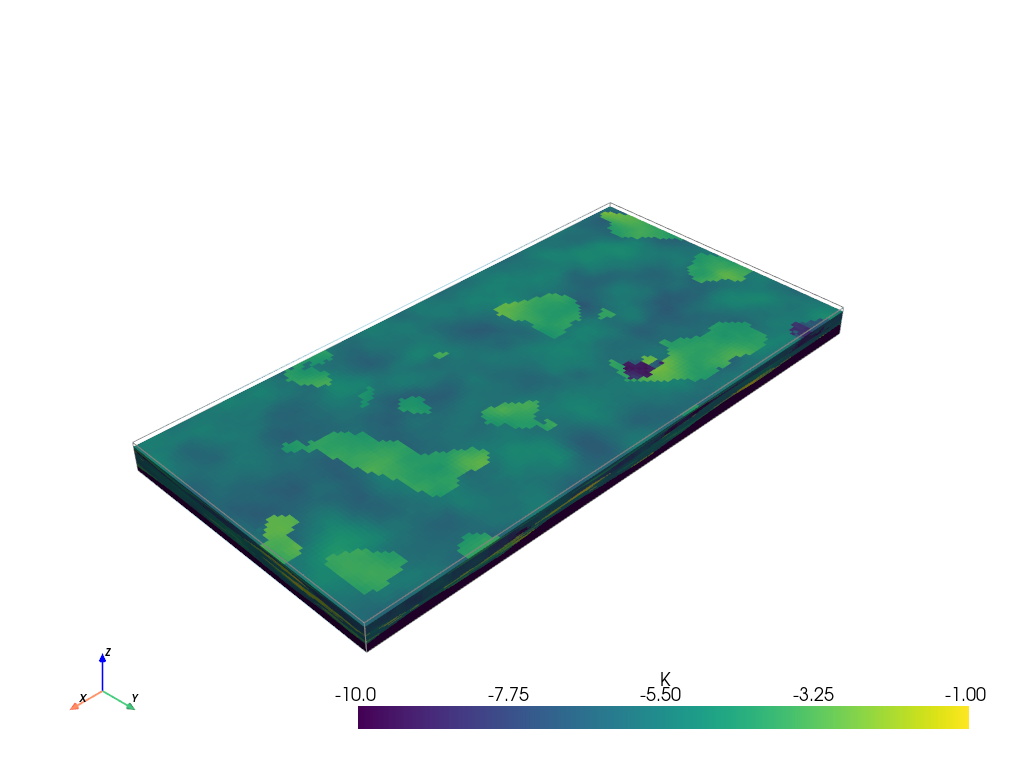

In [40]:
T1.plot_prop("K")

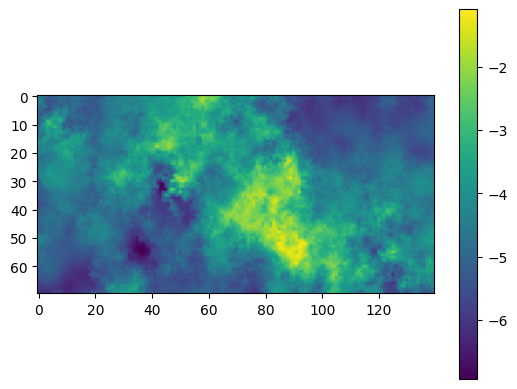

In [69]:
arr = T1.get_prop("K")[0, 0, 0].copy()
arr[~T1.unit_mask("B").astype(bool)] = np.nan
thk_B = T1.get_surface()[0][3] - T1.get_surface()[0][4]
plt.imshow(np.log10(thk_B[0] * 10**np.nanmean(arr, 0)))
plt.colorbar()

In [18]:
import flopy as fp
import ArchPy.ap_mf
from ArchPy.ap_mf import archpy2modflow, array2cellids

In [19]:
archpy_flow = archpy2modflow(T1, exe_name="../../../../../exe/mf6.exe", model_dir="reference")  # create the modflow model
archpy_flow.create_sim(grid_mode="layers", iu=0)  # create the simulation object and choose a certain discretization
archpy_flow.set_k("K", iu=0, ifa=0, ip=0, log=True, k_average_method="anisotropic")  # set the hydraulic conductivity

Simulation created with the following parameters:
Grid mode: layers
To retrieve the simulation, use the get_sim() method


### Construct modflow model

In [20]:
sim = archpy_flow.get_sim()
gwf = archpy_flow.get_gwf()

#### BC

In [21]:
# add BC at left and right on all layers
h1 = 1
h2 = 0
chd_data = []

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, 0] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h1))

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, -1] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h2))

chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)

#### Observations for inverse

In [22]:
# lst_obs = [("h1","HEAD", (3, 13, 25)), ("h2", "HEAD", (3, 25, 50)), ("h3", "HEAD", (3, 45, 80)),
#            ("h4","HEAD", (3, 33, 110)), ("h5","HEAD"]

In [23]:
lst_obs = [("h1","HEAD", (3, 13, 25)), ("h2", "HEAD", (3, 25, 50)), ("h3", "HEAD", (3, 45, 70)),
           ("h4","HEAD", (3, 33, 110)), ("h5","HEAD", (3, 63, 130)), ("h6","HEAD", (3, 23, 130)),
           ("h7","HEAD", (3, 33, 100)), ("h8","HEAD", (3, 13, 121)), ("h9","HEAD", (3, 53, 20)),
           ("h10","HEAD", (3, 35, 88))]

In [24]:
obs_recarray = {
    "head_obs_ref.csv":lst_obs
}
obs_package = fp.mf6.ModflowUtlobs(
    gwf,
    pname="head_obs",
    filename="{}.obs".format(gwf.name),
    digits=5,
    print_input=True,
    continuous=obs_recarray,
)

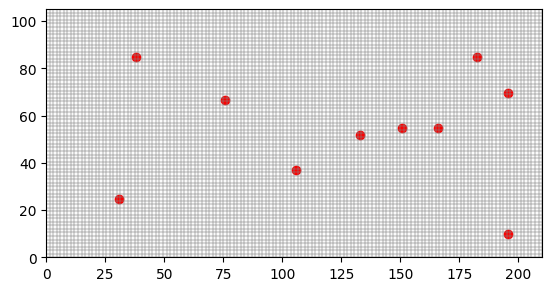

In [25]:
grid = gwf.modelgrid
plt.scatter(
    [grid.xcellcenters[cell[2][1], cell[2][2]] for cell in obs_recarray["head_obs_ref.csv"]],
    [grid.ycellcenters[cell[2][1], cell[2][2]] for cell in obs_recarray["head_obs_ref.csv"]],
    marker="o",
    color="red",
    label="Observation points",
)
gwf.modelgrid.plot(alpha=.3)

In [26]:
sim.ims.remove()
ims = fp.mf6.ModflowIms(sim, complexity="moderate")

In [27]:
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model test...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 641 based on size of stress_period_data
    writing package head_obs...


In [28]:
sim.run_simulation()

FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Gove

(True, [])

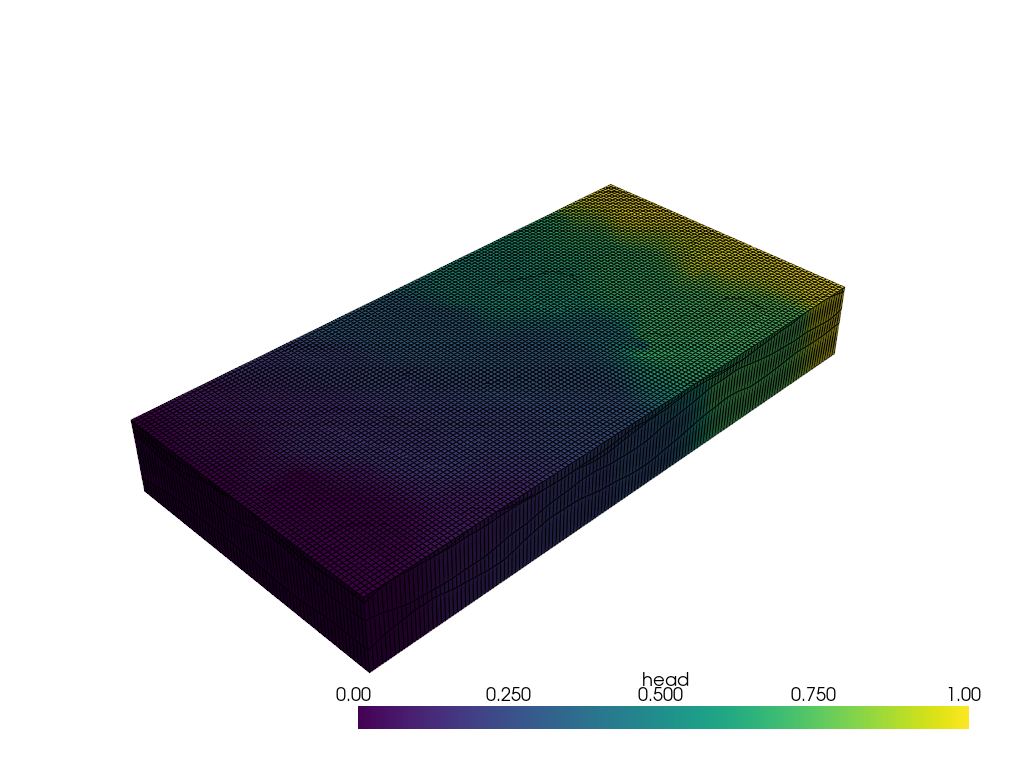

In [29]:
from flopy.export.vtk import Vtk

vert_exag = 3
vtk = Vtk(model=gwf, binary=False, vertical_exageration=vert_exag, smooth=True)
vtk.add_model(gwf)

head = gwf.output.head().get_data()
vtk.add_array(head, name="head")
gwf_mesh = vtk.to_pyvista()

ghosts = np.argwhere(gwf_mesh["idomain"] == 0)
gwf_mesh.remove_cells(ghosts, inplace=True)
ghosts = np.argwhere(gwf_mesh["head"] > 1)
gwf_mesh.remove_cells(ghosts, inplace=True)

pl = pv.Plotter(notebook=True)
pl.add_mesh(gwf_mesh, opacity=1, show_edges=True, scalars="head", cmap="viridis", clim=[0, 1], edge_opacity=0.3)
pl.show()

Now, let us just modify npf package to be homogeneous for inversion (we will assume homogeneous layers)

In [30]:
gwf.npf.k.set_data([1e-6, 1e-4, 1e-7, 1e-3, 1e-10])

In [31]:
gwf.npf.k33.set_data([1, 1, 1, 1, 1])

In [32]:
gwf.npf.k33overk = True

In [33]:
gwf.npf.write()

In [34]:
sim.run_simulation()

FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Gove

(True, [])